Cyna Shirazinejad, 7/7/21

# Notebook 1: loading data for model generation

outline:

* load all data, including:
    * movies from AP2-tagRFP-T, tagGFP2-DNM2 cell lines
* filter out 'valid' tracks
    * valid' tracks are tracks which consist of tracks that appear and disappear 
      in the bounds of the movie with no more than 2 consecutive gaps
    * this is characterized when using AP2 as the primary channel for tracking
* creating dataframes of features from tracked events from fitted amplitude and position space to target feature space
    * each track will be decomposed into features, described in the notebook
    * the number of cell line tags will be included as a label (2 or 3)
    * the experiment number will be included as a label (1-8)
    * the date of the experiment
    * the cmeAnalysis classification as "DNM2-positive" (cmeAnalysisDNM2+) 
      or "DNM2-negative" will be included as a label (1 or 0)
* save dataframes and tracks for future notebooks

# user parameters to toggle plot-generation and/or dataframe construction and corresponding calculations

In [3]:
# set a path to the prefix of the pooled working directory with all of the data 
# the folder that contains all data for this analysis is 'ap2dynm2arcp3_project'
# (this folder, containing all raw and tracking data, is available on GitHub)
unique_user_path_tracks = '/Volumes/GoogleDrive/My Drive/Drubin Lab' # needs to be set for each user
unique_user_path_notebook = '/Users/cynashirazinejad/Documents/GitHub/Jin_Shirazinejad_et_al_branched_actin_manuscript/analysis'
unique_user_saved_outputs = '/Volumes/GoogleDrive/My Drive/Drubin Lab/ap2dynm2arcp3_project/stable_outputs'

# import all necessary Python modules

In [4]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import display_tracks
import merge_tools
import feature_extraction_with_buffer
import generate_index_dictionary

In [5]:
np.save(unique_user_path_notebook+'/unique_user_path_tracks', unique_user_path_tracks)
np.save(unique_user_path_notebook+'/unique_user_path_notebook', unique_user_path_notebook)
np.save(unique_user_path_notebook+'/unique_user_saved_outputs', unique_user_saved_outputs)

# auto directory adding for notebooks

In [6]:
if 'plots' not in os.listdir(unique_user_saved_outputs):
    os.mkdir(unique_user_saved_outputs+'/plots/')
if 'dataframes' not in os.listdir(unique_user_saved_outputs):
    os.mkdir(unique_user_saved_outputs+'/dataframes/')

# loading all tracks originating from 8 fields-of-view

In [7]:
all_tracks = [] # a list of all the track objects; each value is one experiment
all_2_color_experiment_tracks = [] # all AP2/DNM2 tracks from 2 color cell line imaging

# this cell is for the following experiment set: 200804_AD
tracks_200804ADCell004_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_AD/split_channel_data/200804_AD_004/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADCell004_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADCell005_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_AD/split_channel_data/200804_AD_005/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADCell005_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADCell006_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_AD/split_channel_data/200804_AD_006/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADCell006_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADCell007_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_AD/split_channel_data/200804_AD_007/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADCell007_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADCell010_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_AD/split_channel_data/200804_AD_010/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADCell010_1s/Ch1/Tracking/ProcessedTracks.mat')

# add all the tracks to all_tracks
all_tracks.append(tracks_200804ADCell004_1s)
all_tracks.append(tracks_200804ADCell005_1s)
all_tracks.append(tracks_200804ADCell006_1s)
all_tracks.append(tracks_200804ADCell007_1s)
all_tracks.append(tracks_200804ADCell010_1s)

all_2_color_experiment_tracks.append(tracks_200804ADCell004_1s)
all_2_color_experiment_tracks.append(tracks_200804ADCell005_1s)
all_2_color_experiment_tracks.append(tracks_200804ADCell006_1s)
all_2_color_experiment_tracks.append(tracks_200804ADCell007_1s)
all_2_color_experiment_tracks.append(tracks_200804ADCell010_1s)


# this cell is for the following experiment set: 200819_AD
tracks_200819ADCell004_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_AD/split_channel_data/200819_AD_004/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADCell004_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADCell005_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_AD/split_channel_data/200819_AD_005/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADCell005_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADCell006_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_AD/split_channel_data/200819_AD_006/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADCell006_1s/Ch1/Tracking/ProcessedTracks.mat')

# add all the tracks to all_tracks
all_tracks.append(tracks_200819ADCell004_1s)
all_tracks.append(tracks_200819ADCell005_1s)
all_tracks.append(tracks_200819ADCell006_1s)

all_2_color_experiment_tracks.append(tracks_200819ADCell004_1s)
all_2_color_experiment_tracks.append(tracks_200819ADCell005_1s)
all_2_color_experiment_tracks.append(tracks_200819ADCell006_1s) 

# looking at attributes of all events in different cmeAnalysis categories

this portion of the notebook is meant to help diagnose whether the datasets are uniform in their dynamics in terms of simple outputs from cmeAnalysis

In [8]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'] # color labeles

In [9]:
%%capture 
# gather the event category (1-8) frequencies
category_frequencies = []
color_coded_frequencies = []
num_events_category = []
for j, track_set in enumerate(all_tracks):

    num_tracks_exp = len(track_set)
    
    for i in range(1,9): # track categories available

        tracks_category_i_exp = display_tracks.remove_tracks_by_criteria(track_set, track_category=[i])
        num_tracks_cat_i_exp = len(tracks_category_i_exp)
        category_frequencies.append([i, num_tracks_cat_i_exp/num_tracks_exp])
        color_coded_frequencies.append(colors[j])
        num_events_category.append([i, num_tracks_cat_i_exp])

In [10]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(len(category_frequencies)):
    color = color_coded_frequencies[i]
    
    plt.plot(category_frequencies[i][0]+colors.index(color)*0.05, category_frequencies[i][1], '.', color=color)

plt.xlabel('track category')
plt.ylabel('frequency')
plt.title('frequency of track categories\n across individual experiments')
plt.tight_layout()
plt.xticks(np.arange(1,9), labels=np.arange(1,9))
plt.savefig(unique_user_saved_outputs+'/plots/frequencies_categories.png')

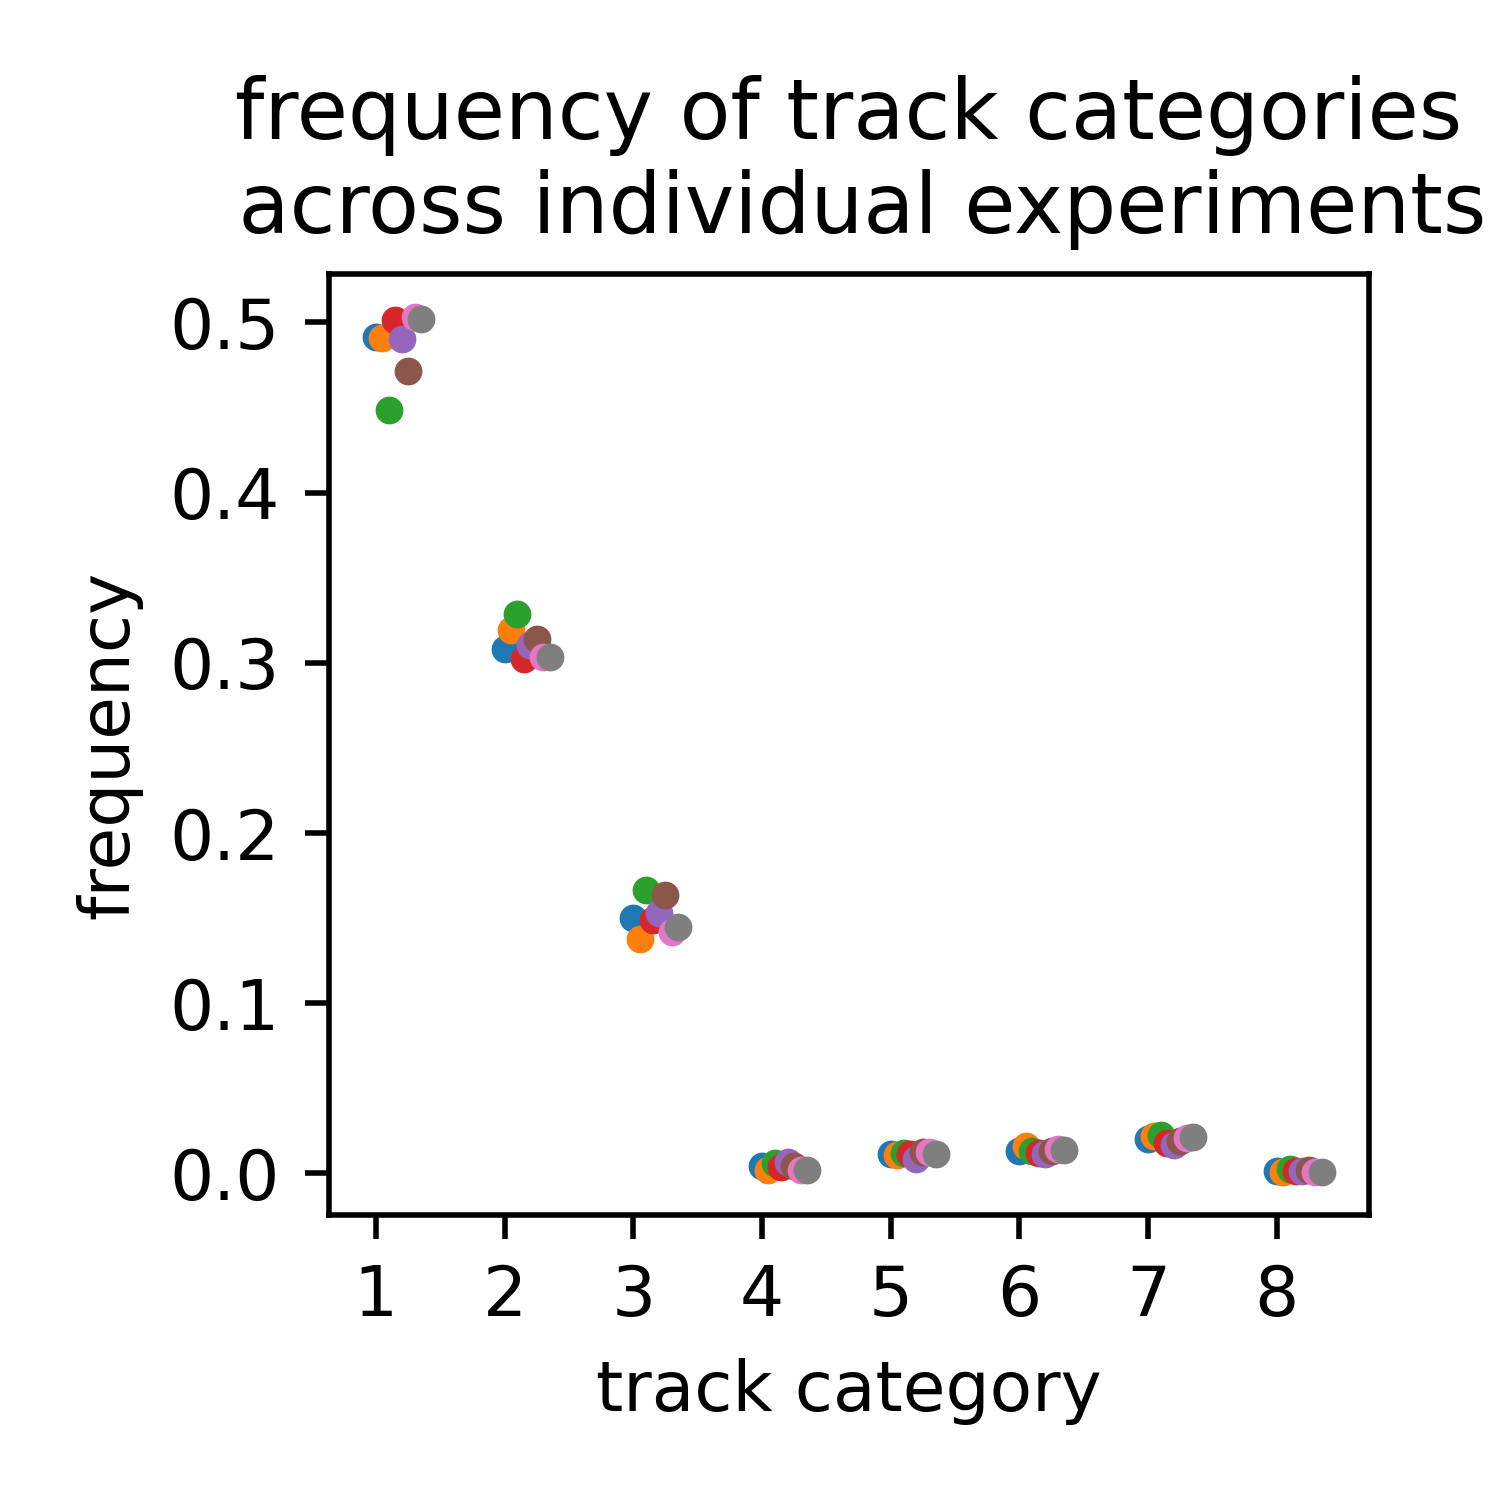

In [11]:
Image(filename=unique_user_saved_outputs+'/plots/frequencies_categories.png', height=500, width=500)

In [12]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(len(num_events_category)):
    color = color_coded_frequencies[i]
    
    plt.plot(category_frequencies[i][0]+colors.index(color)*0.05, num_events_category[i][1], '.', color=color)
    
plt.xlabel('track category')
plt.ylabel('counts')
plt.title('counts of track categories \nacross individual experiments')
plt.tight_layout()
plt.xticks(np.arange(1,9), labels=np.arange(1,9))
plt.savefig(unique_user_saved_outputs+'/plots/counts_categories.png')

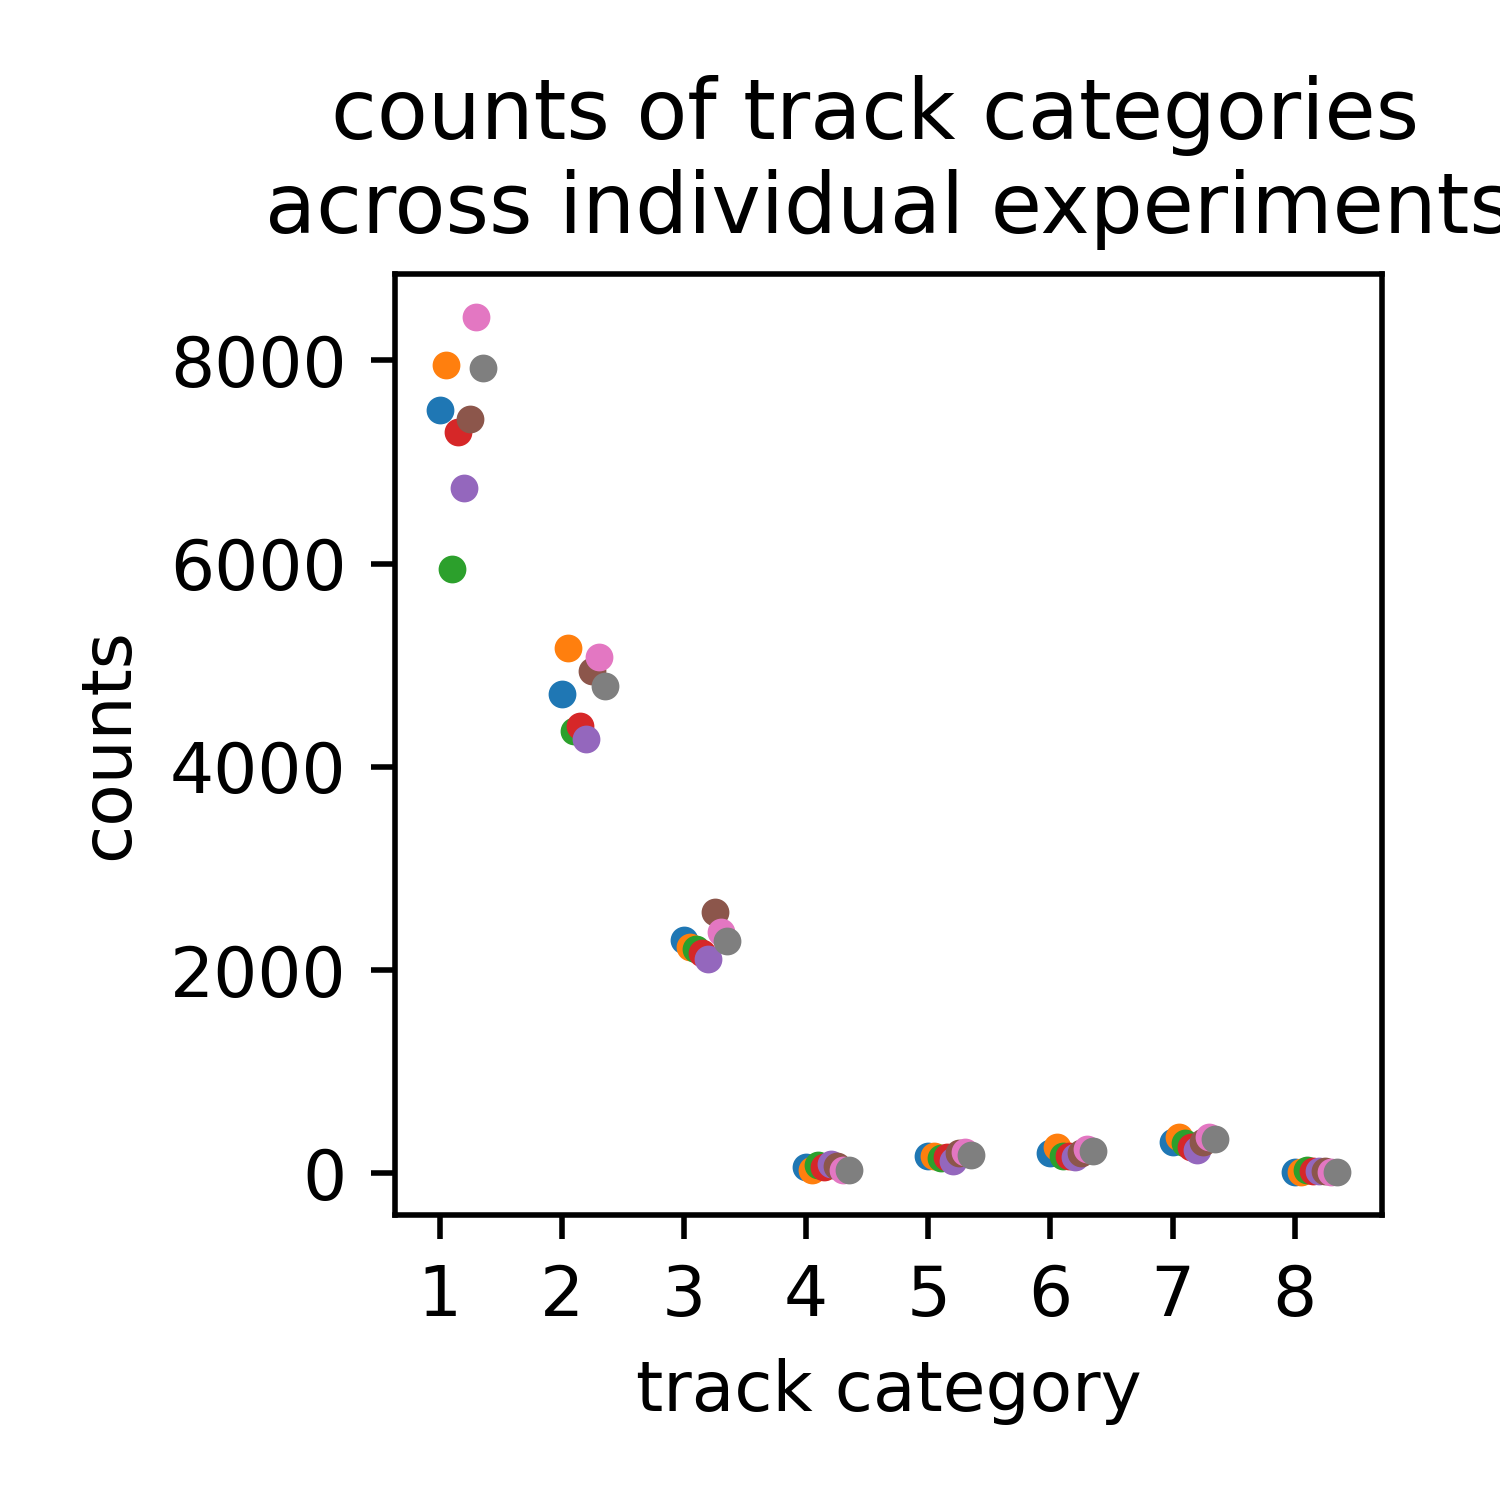

In [13]:
Image(filename=unique_user_saved_outputs+'/plots/counts_categories.png', height=500, width=500)

In [14]:
index_dictionary = generate_index_dictionary.return_index_dictionary() # get indices of features in ProcessedTracks

In [15]:
x_std = [[] for i in range(8)] # get the width of the fits of the puncta to a normal distribution

for j, track_set in enumerate(all_tracks):
    
    for i in range(len(track_set)):
        if track_set[i][index_dictionary['index_catIdx']][0][0]==1:
            xstd_temp = track_set[i][index_dictionary['index_x_pos_pstd']][0]
            for std in xstd_temp:
                x_std[j].append(std)

In [16]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(8):
    plt.hist(x_std[i], cumulative=True, density=True, histtype='step', bins='auto', color=colors[i])
    
plt.xlabel('standard deviation \nof puncta fit \n(pixels~0.1 microns)')
plt.ylabel('cumulative frequency')
plt.title('size of puncta fits\n across individual experiments\n (valid tracks)')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/puncta_sizes.png')

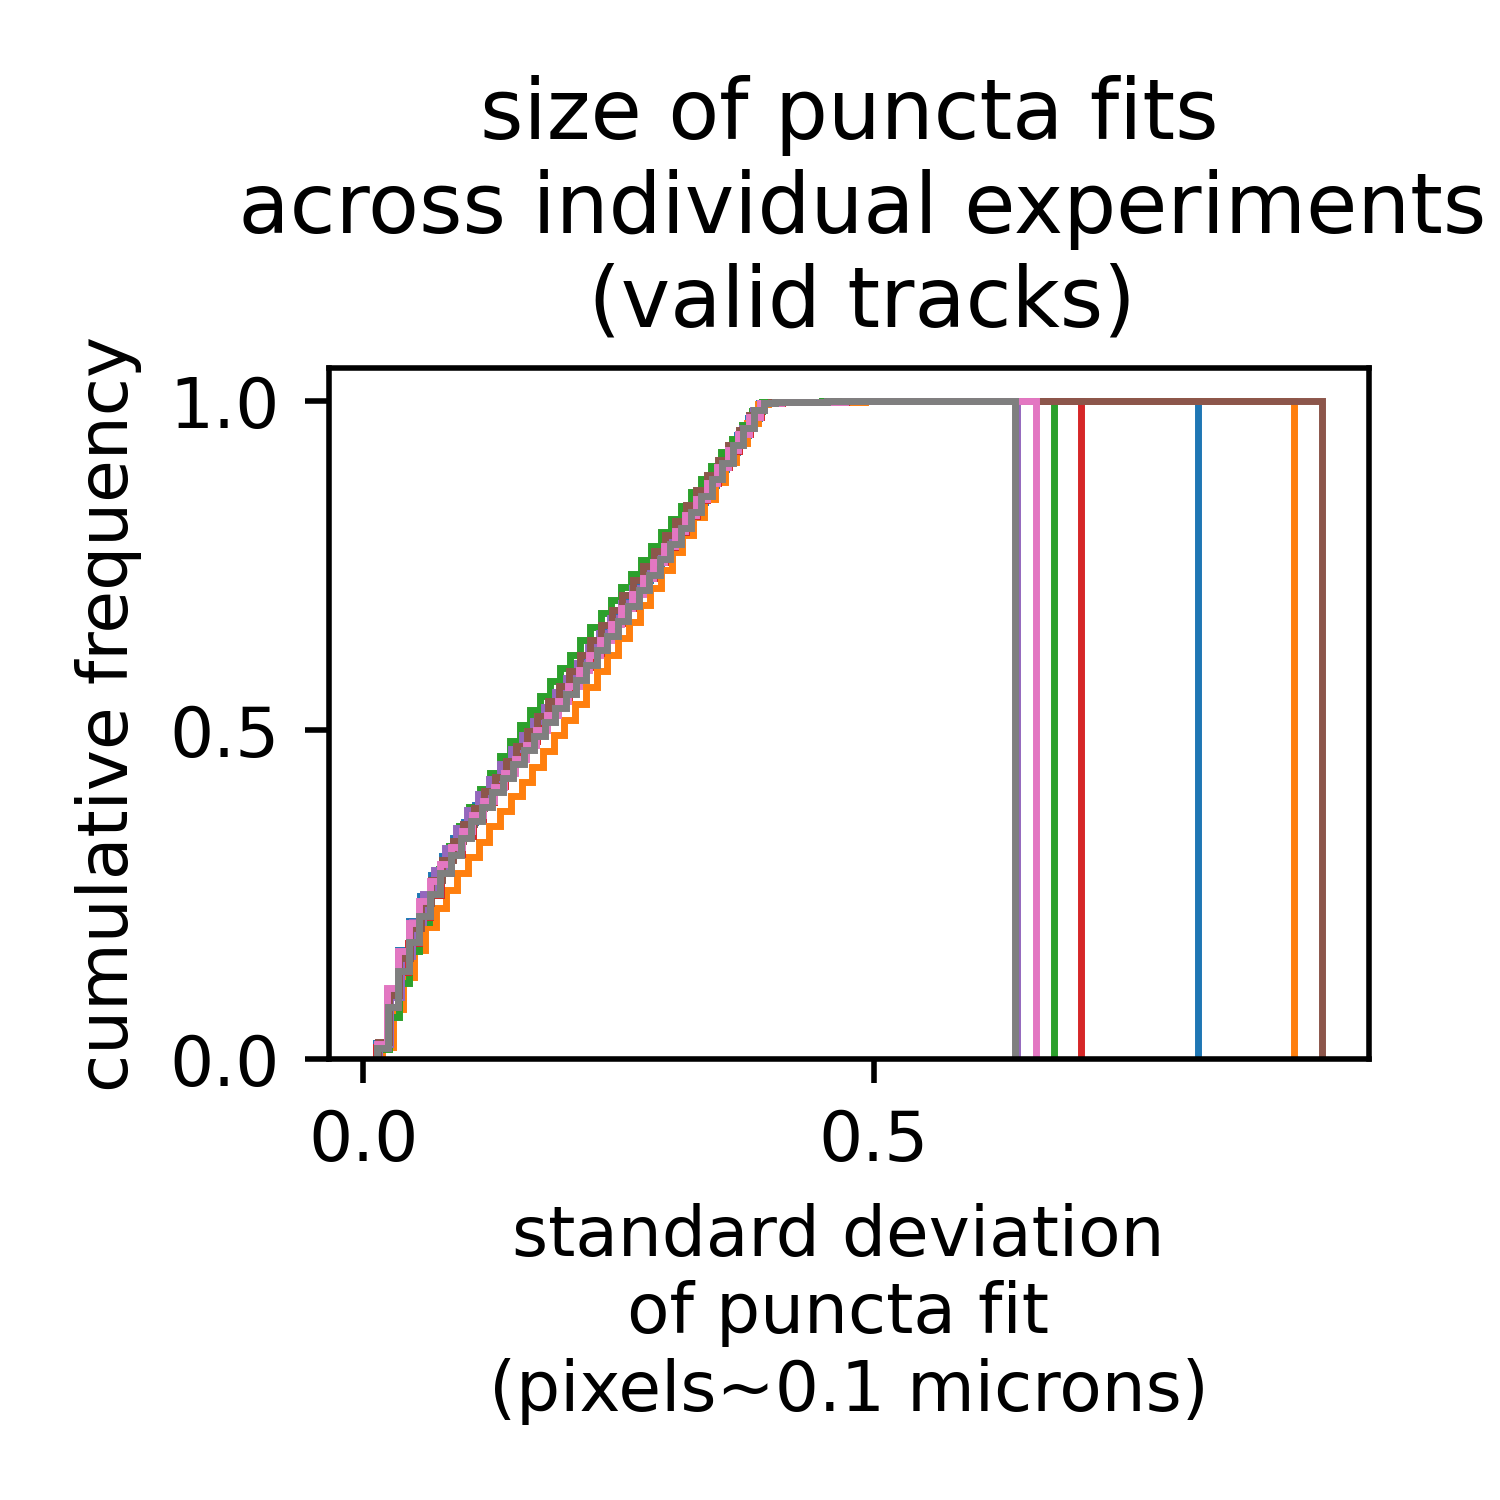

In [17]:
Image(filename=unique_user_saved_outputs+'/plots/puncta_sizes.png', height=500, width=500)

In [18]:
psf_counts = [[] for i in range(8)] # gather info on the status of the psf (non-psf, psf, or gaps are options for each time point)
fraction_psf = [[] for i in range(8)]

for j, track_set in enumerate(all_tracks):
    num_tracks_exp = len(track_set)    
    for i in range(len(track_set)):
        if track_set[i][index_dictionary['index_catIdx']][0][0]==1:
            psf_temp = track_set[i][index_dictionary['index_isPSF']][0]
            psf_counts[j].append(len(np.where(np.array(psf_temp)==1)[0]))
            fraction_psf[j].append(len(np.where(psf_temp==1)[0])/len(psf_temp))

In [19]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(8):
    plt.hist(psf_counts[i], cumulative=True, density=True, histtype='step', bins='auto', color=colors[i])
plt.xlabel('number of PSF detections')
plt.ylabel('cumulative frequency')
plt.title('# of PSF detections per track \nacross individual experiments \n(valid tracks)')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/psf_counts_per_track_per_exp.png')

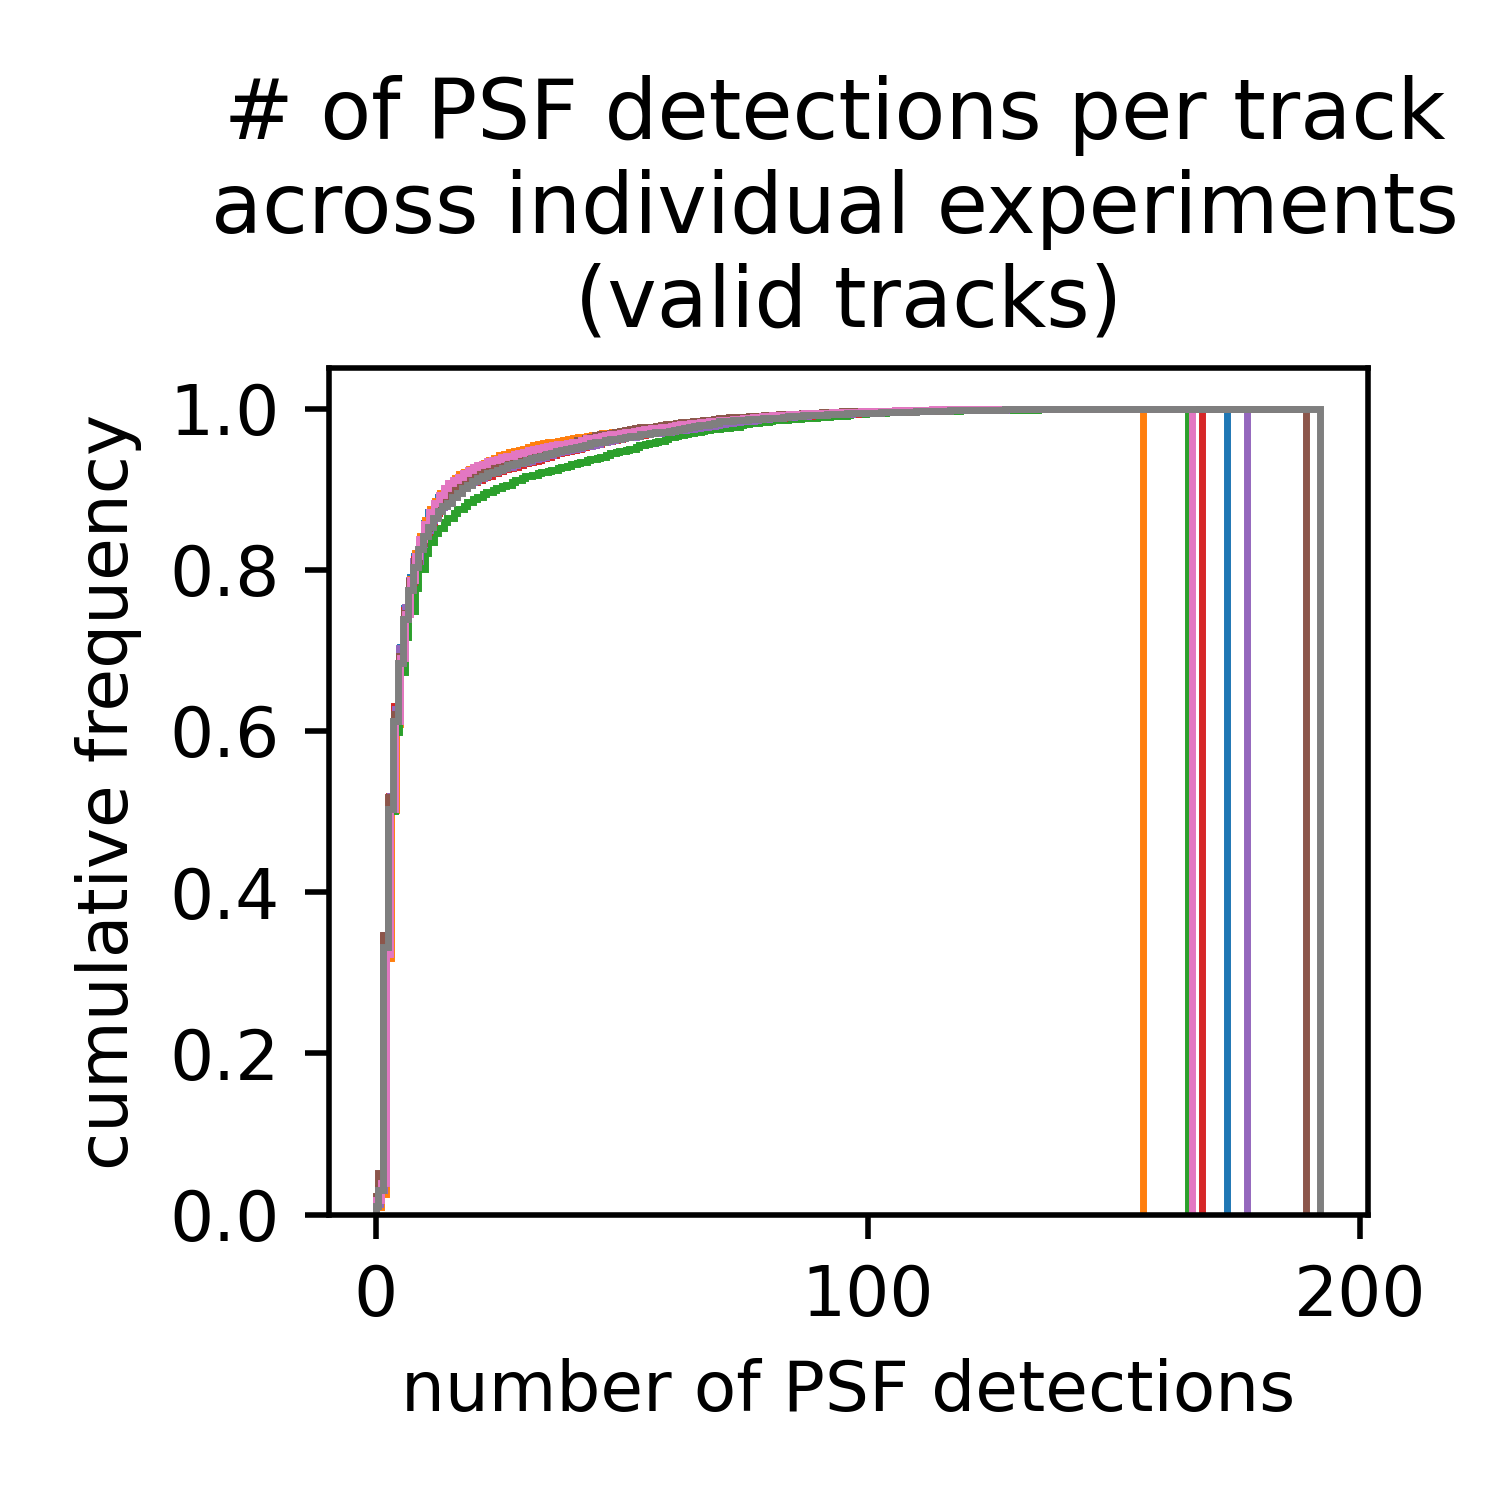

In [20]:
Image(filename=unique_user_saved_outputs+'/plots/psf_counts_per_track_per_exp.png', height=500, width=500)

In [21]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(8):
    plt.hist(fraction_psf[i], cumulative=True, density=True, histtype='step', bins='auto', color=colors[i])
plt.xlabel('fraction of each event with PSF detections')
plt.ylabel('cumulative frequency')
plt.title('fraction of each containing\n PSF detections per \nindividual experiments\n (valid tracks)')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/psf_fractions_per_track_per_exp.png')

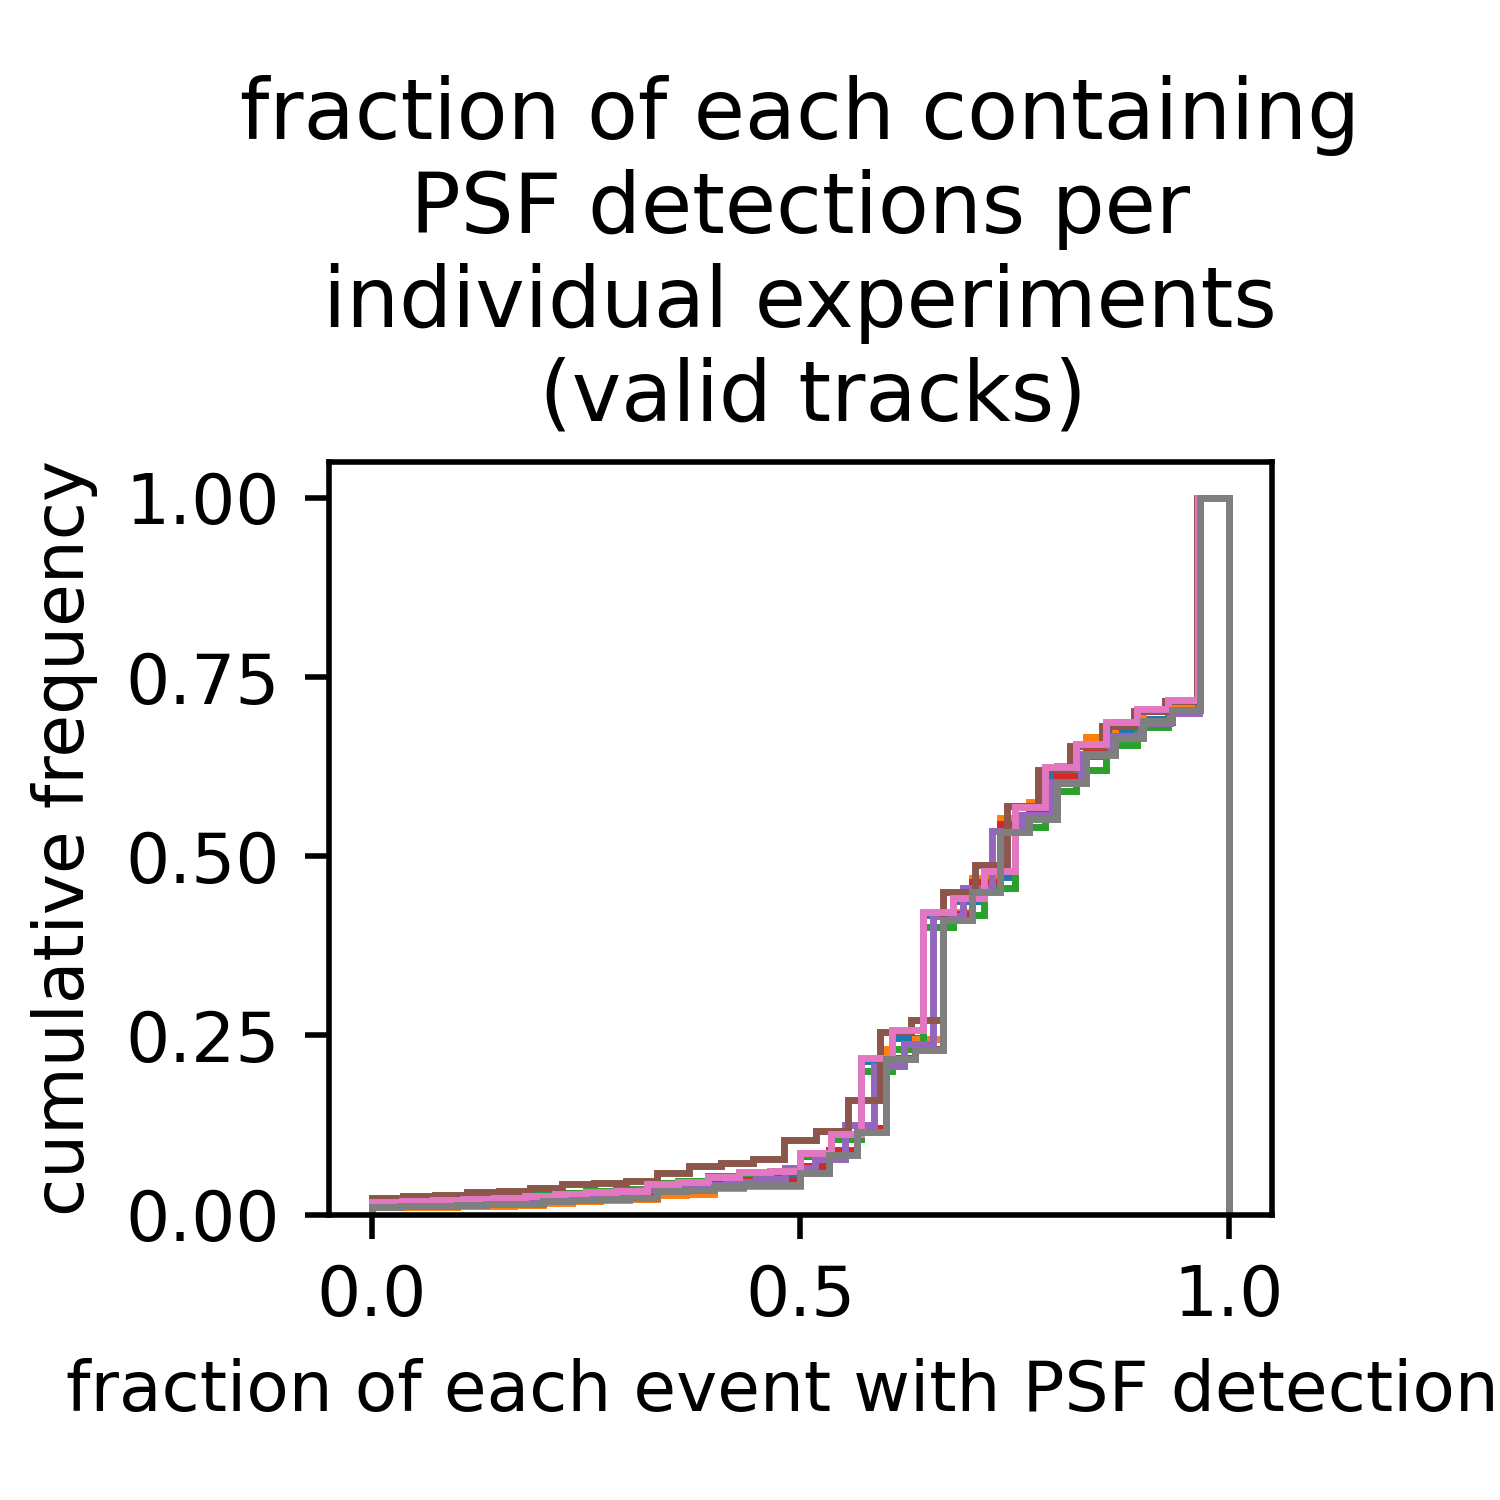

In [22]:
Image(filename=unique_user_saved_outputs+'/plots/psf_fractions_per_track_per_exp.png', height=500, width=500)

In [23]:
nonpsf_counts = [[] for i in range(8)] # calculate the fraction of each event that is a psf/non-psf fit
fraction_nonpsf = [[] for i in range(8)]
for j, track_set in enumerate(all_tracks):
    num_tracks_exp = len(track_set)
    for i in range(len(track_set)):
        if track_set[i][index_dictionary['index_catIdx']][0][0]==1:
            psf_temp = track_set[i][index_dictionary['index_isPSF']][0]
            nonpsf_counts[j].append(len(np.where(psf_temp==0)[0]))
            fraction_nonpsf[j].append(len(np.where(psf_temp==0)[0])/len(psf_temp))

In [24]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(8):
    plt.hist(nonpsf_counts[i], cumulative=True, density=True, histtype='step', bins='auto', color=colors[i])
plt.xlabel('number of non-PSF detections')
plt.ylabel('cumulative frequency')
plt.title('# of non-PSF detections per track \nacross individual experiments \n(valid tracks)')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/nonpsf_counts_per_track_per_exp.png')

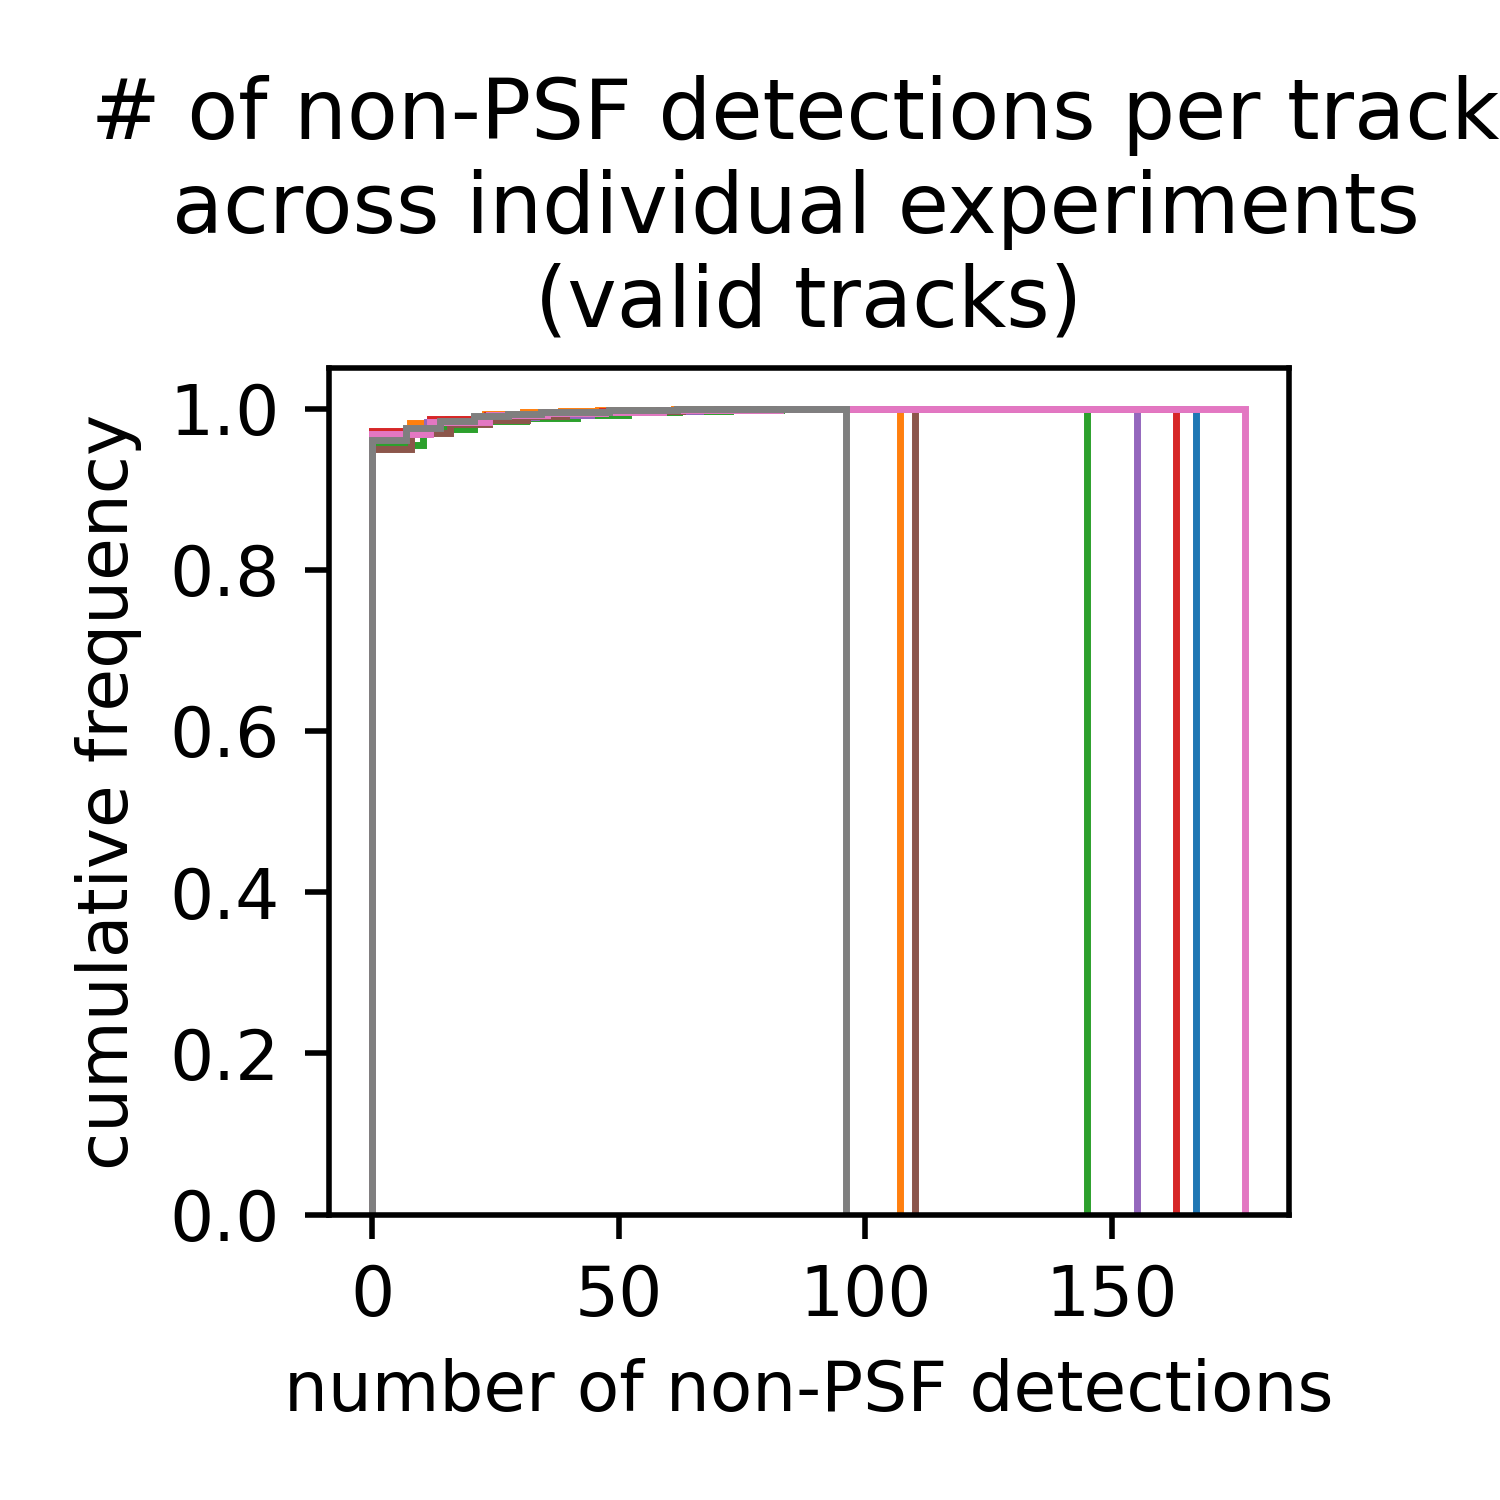

In [25]:
Image(filename=unique_user_saved_outputs+'/plots/nonpsf_counts_per_track_per_exp.png', height=500, width=500)

In [26]:
%%capture
plt.figure(dpi=500, figsize=(3,3))
for i in range(8):
    plt.hist(fraction_nonpsf[i], cumulative=True, density=True, histtype='step', bins='auto', color=colors[i])
plt.xlabel('fraction of each event \nwith non-PSF detections')
plt.ylabel('cumulative frequency')
plt.title('fraction of each containing\n non-PSF detections per \nindividual experiments\n (valid tracks)')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/nonpsf_fractions_per_track_per_exp.png')

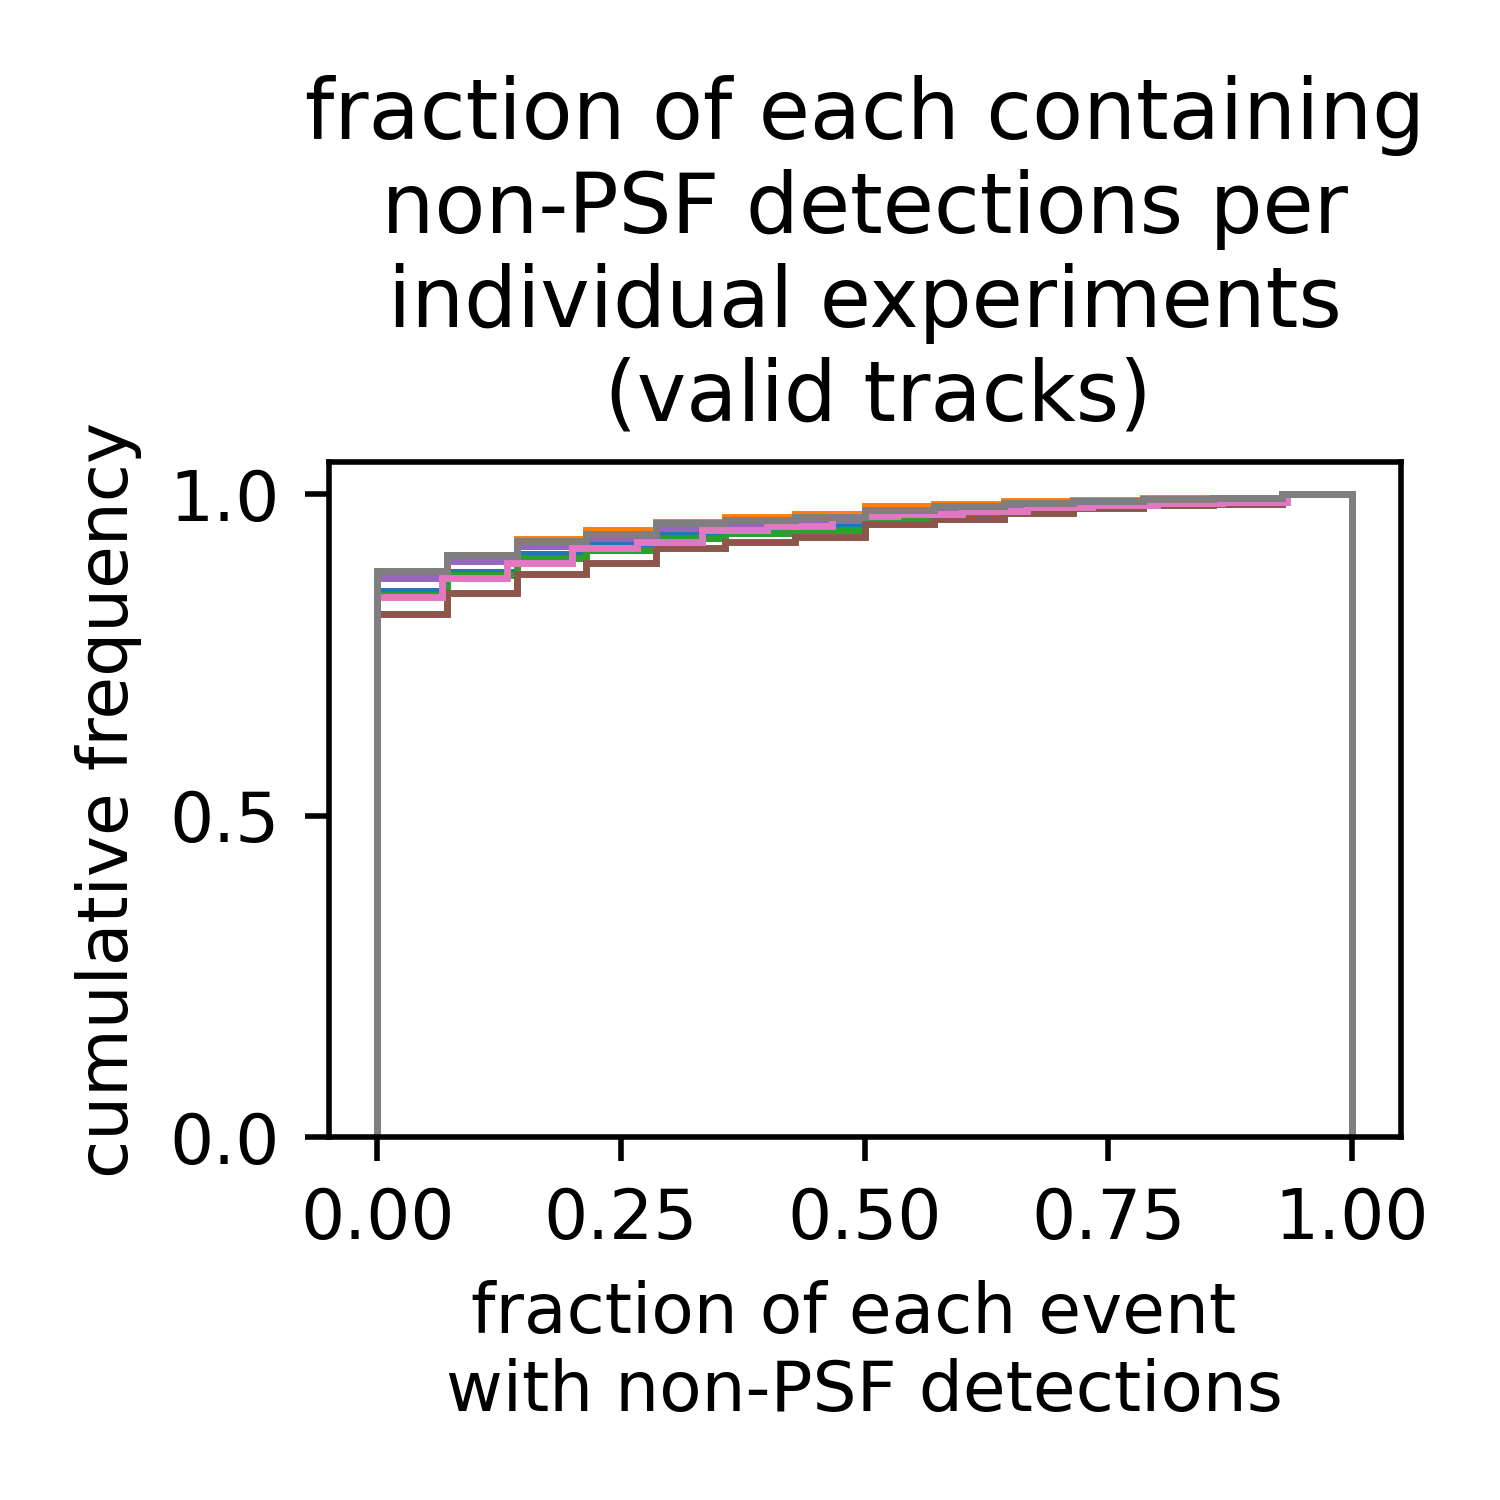

In [27]:
Image(filename=unique_user_saved_outputs+'/plots/nonpsf_fractions_per_track_per_exp.png', height=500, width=500)

# all track feature options:

conventions:
1. intensities: fitted amplitude of fluorescence (excluding fitted local background)
2. positions: fitted positions (x,y) of two dimensional point-spread-functions per frame in track
3. voxel-width = 108 nm

features:

1. 'lifetime': time between the first and last frame of detected AP2 (seconds)
2. 'max_int_ap2': maximum intensity (a.u. fluorescence)
3. 'max_int_dnm2': maximum intensity (a.u. fluorescence)
4. 'dist_traveled_ap2': track start-to-finish net movement (pixels)
5. 'dist_traveled_dnm2': track start-to-finish net movement (pixels)
6. 'max_dist_between_ap2_dnm2': the maximum frame-to-frame separation between AP2 and DNM2 (pixels)
7. 'md_ap2': mean displacement (pixels)
8. 'md_dnm2': mean displacement (pixels)
9. 'time_to_peak_ap2': time for the intensity to reach its peak (seconds) [0 if peak is first frame]
10. 'time_to_peak_dnm2': time for the intensity to reach its peak (seconds) [0 if peak is first frame]
11. 'time_after_peak_ap2': time for intensity to decay from its peak (seconds) [0 if peak is last frame]
12. 'time_after_peak_dnm2': time for intensity to decay from its peak (seconds) [0 if peak is last frame]
13. 'time_between_peaks_ap2_dnm2': time between peaks of two channels (seconds)
14. 'avg_int_change_to_peak_ap2': average change in intensity to the peak (a.u. fluorescence) [0 if peak is first frame]
15. 'avg_int_change_to_peak_dnm2': average change in intensity to the peak (a.u. fluorescence) [0 if peak is first frame]
16. 'avg_int_change_after_peak_ap2': average change in intensity after the peak (a.u. fluorescence) [0 if peak is last frame]
17. 'avg_int_change_after_peak_dnm2': average change in intensity after the peak (a.u. fluorescence) [0 if peak is last frame]
18. 'peak_int_diff_ap2_dnm2': difference between maximum intensity of channel 0 and channel 1 (a.u. fluorescence)
19. 'ratio_max_int_ap2_dnm2': ratio between maximum intensity of channel 0 and channel 1 (unitless)
20. 'mean_ap2': average of fluorescence (a.u. fluorescence)
21. 'mean_dnm2': average of fluorescence (a.u. fluorescence)
22. 'variation_ap2': variation of fluorescence (a.u. fluorescence^2)
23. 'variation_dnm2': variation of fluorescence (a.u. fluorescence^2)
24. 'skewness_ap2': skewness of fluorescence (unitless)
25. 'skewness_dnm2': skewness of fluorescence (unitless)
26. 'kurtosis_ap2': kurtosis of fluorescence (unitless)
27. 'kurtosis_dnm2': kurtosis of fluorescence (unitless)
28. 'number_significant_dnm2': number of significant detections with p-val lower than provided threshold (counts) [p-val < 0.01]
29. 'max_consecutive_significant_dnm2': maximum number of consecutive significant detections with p-val lower than provided threshold (counts) [p-val < 0.01]
30. 'fraction_significant_dnm2': fraction of event with significant detections with p-val lower than provided threshold (unitless) [p-val < 0.01]
31. 'fraction_peak_ap2': fraction of the event where the peak is located (unitless)
32. 'fraction_peak_dnm2': fraction of the event where the peak is located (unitless)

In [28]:
# the physical units of each track feature
feature_units = ['seconds',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'pixels',
                 'pixels',
                 'pixels',
                 'pixels',
                 'pixels',
                 'seconds',
                 'seconds',
                 'seconds',
                 'seconds',
                 'seconds',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'unitless',
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'a.u. fluorescence**2',
                 'a.u. fluorescence**2',
                 'unitless',
                 'unitless',
                 'unitless',
                 'unitless',
                 'counts',
                 'counts',
                 'unitless',
                 'unitless',
                 'unitless']

In [29]:
possible_track_features_labels = ['lifetime',
                                 'max_int_ap2',
                                 'max_int_dnm2',
                                 'dist_traveled_ap2',
                                 'dist_traveled_dnm2',
                                 'max_dist_between_ap2_dnm2',
                                 'md_ap2',
                                 'md_dnm2',
                                 'time_to_peak_ap2',
                                 'time_to_peak_dnm2',
                                 'time_after_peak_ap2',
                                 'time_after_peak_dnm2',
                                 'time_between_peaks_ap2_dnm2',
                                 'avg_int_change_to_peak_ap2',
                                 'avg_int_change_to_peak_dnm2',
                                 'avg_int_change_after_peak_ap2',
                                 'avg_int_change_after_peak_dnm2',
                                 'peak_int_diff_ap2_dnm2',
                                 'ratio_max_int_ap2_dnm2',
                                 'mean_ap2',
                                 'mean_dnm2',
                                 'variation_ap2',
                                 'variation_dnm2',
                                 'skewness_ap2',
                                 'skewness_dnm2',
                                 'kurtosis_ap2',
                                 'kurtosis_dnm2',
                                 'number_significant_dnm2',
                                 'max_consecutive_significant_dnm2',
                                 'fraction_significant_dnm2',
                                 'fraction_peak_ap2',
                                 'fraction_peak_dnm2']

In [30]:
possible_track_features = ['lifetime',
                            'max_int_ch0',
                            'max_int_ch1',
                            'dist_traveled_ch0',
                            'dist_traveled_ch1',
                            'max_dist_between_ch0_ch1',
                            'md_ch0',
                            'md_ch1',
                            'time_to_peak_ch0',
                            'time_to_peak_ch1',
                            'time_after_peak_ch0',
                            'time_after_peak_ch1',
                            'time_between_peaks_ch0_ch1',
                            'avg_int_change_to_peak_ch0',
                            'avg_int_change_to_peak_ch1',
                            'avg_int_change_after_peak_ch0',
                            'avg_int_change_after_peak_ch1',
                            'peak_int_diff_ch0_ch1',
                            'ratio_max_int_ch0_ch1',
                            'mean_ch0',
                            'mean_ch1',
                            'variation_ch0',
                            'variation_ch1',
                            'skewness_ch0',
                            'skewness_ch1',
                            'kurtosis_ch0',
                            'kurtosis_ch1',
                            'number_significant_ch1',
                            'max_consecutive_significant_ch1',
                            'fraction_significant_ch1',
                            'fraction_peak_ch0',
                            'fraction_peak_ch1']

In [31]:
# save lists of features and corresponding units
np.save(unique_user_saved_outputs+'/dataframes/feature_units', feature_units)
np.save(unique_user_saved_outputs+'/dataframes/possible_track_features', possible_track_features)
np.save(unique_user_saved_outputs+'/dataframes/possible_track_features_labels', possible_track_features_labels)

# extract features from all tracks, labeled by experiment (0-7), number of imaging channels/labels, and date of experiment

In [32]:
print('total number of 2 color experiments: ' + str(len(all_2_color_experiment_tracks)))

total number of 2 color experiments: 8


In [101]:
# extract valid tracks from 2 color cell line movies
valid_tracks_separate_experiments_2_color = [display_tracks.remove_tracks_by_criteria(track_set, track_category=[1]) for track_set in all_2_color_experiment_tracks]
# merge all valid tracks into one tracks array
merged_all_valid_tracks_2_color = merge_tools.merge_experiments(valid_tracks_separate_experiments_2_color,[list(range(len(track_set))) for track_set in valid_tracks_separate_experiments_2_color])
# the experiment number for 2 color cell line movies (1-8)
experiment_number_2_channel_label = [i for i in range(len(valid_tracks_separate_experiments_2_color)) for _ in range(len(valid_tracks_separate_experiments_2_color[i]))]
# labels for the two days of imaging
date_of_experiment_2_channel = [200804 if i < 5 else 200819 for i in range(len(valid_tracks_separate_experiments_2_color)) for _ in range(len(valid_tracks_separate_experiments_2_color[i]))]

number_of_channels_label = [2 for i in range(len(experiment_number_2_channel_label))]

# no drugs/media treatment applied to these cells
cell_condition = ['no-treatment' for i in range(len(experiment_number_2_channel_label))]

The number of tracks returned: 7510

The number of tracks returned: 7955

The number of tracks returned: 5950

The number of tracks returned: 7295

The number of tracks returned: 6746

The number of tracks returned: 7429

The number of tracks returned: 8426

The number of tracks returned: 7928



In [85]:
print('total number of valid tracks: ' + str(len(experiment_number_2_channel_label)))

total number of valid tracks: 59239


In [86]:
# use TrackFeatures() to extract all 30 features for both cell lines
all_track_features_2_color = feature_extraction_with_buffer.TrackFeatures(merged_all_valid_tracks_2_color) # an instance of a to-be feature matrix of tracks
all_track_features_2_color.add_features(possible_track_features) # set the features to be extracted
all_track_features_2_color.extract_features() # extract all features
extracted_features_all_tracks_2_color = all_track_features_2_color.feature_matrix # feature matrix for all tracks

In [102]:
# create an array shaped by N tracks x 30 features
merged_features = extracted_features_all_tracks_2_color

# experiment numbers 0-7 for 2 color imaging experiments
all_experiments_labels = np.array(experiment_number_2_channel_label)

# add dates of all experiments
all_date_labels = np.array(date_of_experiment_2_channel)
#                            + date_of_experiment_3_channel)

cell_condition = np.array(cell_condition)

# merge features with labels (experiment number, date, and number of channels)
merged_features = np.concatenate((merged_features,
                                  all_experiments_labels.reshape(merged_features.shape[0],-1)), axis=-1)
merged_features = np.concatenate((merged_features,
                                  np.array(number_of_channels_label).reshape(merged_features.shape[0],-1)), axis=-1)
merged_features = np.concatenate((merged_features,
                                  np.array(all_date_labels).reshape(merged_features.shape[0],-1)), axis=-1)

merged_features = np.concatenate((merged_features,
                                  np.array(cell_condition).reshape(merged_features.shape[0],-1)), axis=-1)

# add cmeAnalysis's label for DNM2 positive or negative

In [103]:
# all valid tracks in all experiments
merged_all_valid_tracks = merged_all_valid_tracks_2_color
# + merged_all_valid_tracks_3_color

# extract the output of cmeAnalysis' predictions on whether a track is DNM2 positive or negative
significant_dynamin2_cmeAnalysis_prediction = []

# an index map for ProcessedTracks.mat attributes for 2 color tracking experiments from cmeAnalysis
index_dictionary = generate_index_dictionary.return_index_dictionary()

for track in merged_all_valid_tracks: # iterate through all tracks

    significant_dynamin2 = track[index_dictionary['index_significantSlave']][1]
    significant_dynamin2_cmeAnalysis_prediction.append(significant_dynamin2)

In [104]:
# concatenate features with cmeAnalysis prediction
merged_features = np.concatenate((merged_features,
                                  np.array(significant_dynamin2_cmeAnalysis_prediction).reshape(merged_features.shape[0],-1)), axis=-1)

In [105]:
# create a dataframe with extracted features and track labels
df_merged_features = pd.DataFrame(data=merged_features, columns=possible_track_features_labels+['experiment_number',
                                                                                                'number_of_channels', 
                                                                                                'date', 
                                                                                                'cell_condition', 
                                                                                                'cmeAnalysis_dynamin2_prediction'])

# save the dataframe for subsequent notebooks
compression_opts = dict(method='zip',
                        archive_name=unique_user_saved_outputs+'/dataframes/df_merged_features.csv')  

df_merged_features.to_csv(unique_user_saved_outputs+'/dataframes/df_merged_features.zip', index=False,
                                                          compression=compression_opts) 

# save all valid tracks, split to allow for <100 mb permitted size

In [91]:
number_of_track_splits = 20
np.save(unique_user_saved_outputs+"/dataframes/number_of_track_splits", number_of_track_splits)

In [92]:
# split tracks
split_valid_tracks = np.array_split(np.array(list(merged_all_valid_tracks)),number_of_track_splits)

In [93]:
# save each track array chunk
for i in range(len(split_valid_tracks)):

    np.save(unique_user_saved_outputs+"/dataframes/merged_all_valid_tracks_"+str(i), np.array(split_valid_tracks[i]))

In [43]:
df_merged_features

,lifetime,max_int_ap2,max_int_dnm2,dist_traveled_ap2,dist_traveled_dnm2,max_dist_between_ap2_dnm2,md_ap2,md_dnm2,time_to_peak_ap2,time_to_peak_dnm2,...,number_significant_dnm2,max_consecutive_significant_dnm2,fraction_significant_dnm2,fraction_peak_ap2,fraction_peak_dnm2,experiment_number,number_of_channels,date,cell_condition,cmeAnalysis_dynamin2_prediction
0,216.0,1796.284550322625,740.5167555488542,7.203811618034117,7.203811618034117,2.6306555388877793,0.5662615075017282,0.7259134903726635,159.0,186.0,...,167.0,43.0,0.7389380530973452,0.7035398230088495,0.8230088495575221,0.0,2.0,200804.0,no_treatment,1.0
1,201.0,2215.53269478876,1505.4332733213157,17.220725894550196,14.507134678864624,3.79752603297003,0.42457356996667195,0.9126711550232961,111.0,107.0,...,115.0,89.0,0.5450236966824644,0.5260663507109005,0.5071090047393365,0.0,2.0,200804.0,no_treatment,1.0
2,201.0,864.9760871693655,421.40569093332397,17.621865760603715,17.130473203716313,3.472331504351925,0.5665883248115021,0.7764040384690212,42.0,44.0,...,167.0,70.0,0.7914691943127962,0.1990521327014218,0.20853080568720378,0.0,2.0,200804.0,no_treatment,1.0
3,192.0,509.7951655896294,356.30252072661403,10.804210974044102,13.29284212911614,5.888568784172939,0.4287357708278232,1.0581767956988943,44.0,190.0,...,112.0,57.0,0.5544554455445545,0.21782178217821782,0.9405940594059405,0.0,2.0,200804.0,no_treatment,1.0
4,188.0,1636.4223863360899,883.606435993711,11.255090440377664,7.793073957870642,5.53100638637804,0.41579163122869783,0.753372444487746,174.0,169.0,...,169.0,80.0,0.8535353535353535,0.8787878787878788,0.8535353535353535,0.0,2.0,200804.0,no_treatment,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,2.0,28.623953094644072,19.04267536740483,1.8796908488080917,2.915253367017944,2.389665408897578,1.0923364294023667,1.3549845245985959,6.0,0.0,...,0.0,0.0,0.0,0.5,0.0,7.0,2.0,200819.0,no_treatment,0.0
59235,2.0,15.16406513256624,14.946216236886015,7.447355313813243,2.6664318562049107,6.454258735272825,2.453557868995878,1.923303689919584,6.0,3.0,...,0.0,0.0,0.0,0.5,0.25,7.0,2.0,200819.0,no_treatment,0.0
59236,2.0,21.87979204779379,26.215771722354116,4.384565199592009,1.665403908980792,4.318207296451148,1.8737702023929197,2.4187978088233795,6.0,6.0,...,1.0,1.0,0.08333333333333333,0.5,0.5,7.0,2.0,200819.0,no_treatment,0.0
59237,2.0,20.236622704590612,13.95459467883471,1.0793876124245154,2.8886438427430146,3.897008864376748,0.843483102219812,2.105213983074413,6.0,11.0,...,0.0,0.0,0.0,0.5,0.9166666666666666,7.0,2.0,200819.0,no_treatment,0.0


In [49]:
np.sum(df_merged_features.values==df_merged_features.values)==df_merged_features.size

True

In [96]:
def upload_tracks_and_metadata(path_to_tracks,
                               track_categories,
                               identifier_string,
                               features,
                               labels,
                               experiment_number_adjustment=0):
    """
    Format tracks contained in folders into a dataframe of extracted physical features 
    as well as accompanying experimental metadata.
    
    Args:
        path_to_tracks (string): path to the folder containing the enclosed tracking files
        track_categories (list): a list of integers for the cmeAnalysis track categories to keep for further analysis
        identifier_string (string): a label within all tracking head folders that uniquely identify relevant content
        features (list): a list with string elements containing the features to be extracted from each track
        labels (list): a list of string elements describing each features' designation in the dataframe output
        experiment_number_adjustment (int): a number to offset the starting cout for experiment number, nonzero if data is to be 
            appended to another existing dataset
    
    Returns:
    
        df (dataframe): a dataframe of features and metadata
        merged_all_tracks (ndarray): 
    """
    all_track_paths = os.listdir(path_to_tracks)
    all_track_paths = [exp for exp in all_track_paths if identifier_string in exp]
    all_track_paths.sort()
    print('\nfolders to mine:')
    print(all_track_paths)
    
    tracks = []
    dates = []
    cell_line_tags = []
    current_tracked_channels = []
    number_of_tags = []
    experiment = []
    condition = []
    experiment_number = []
    framerate = []
    
    for exp_number, exp in enumerate(all_track_paths):
        
        current_tracks = display_tracks.load_tracks(path_to_tracks + '/' + exp + '/Ch1/Tracking/ProcessedTracks.mat')
        current_tracks = display_tracks.remove_tracks_by_criteria(current_tracks, track_category=track_categories)
        tracks.append(current_tracks)
        
        num_tracks = len(current_tracks)
        
        metadata = exp.split('_')
        
#         tracks += current_tracks
        dates += [int(metadata[0])]*num_tracks
        cell_line_tags += [metadata[1]]*num_tracks
        current_tracked_channels += [metadata[2]]*num_tracks
        number_of_tags += [len(metadata[1].split('-'))]*num_tracks
        experiment += [metadata[3]]*num_tracks
        condition += [metadata[4]]*num_tracks
        experiment_number += [exp_number+experiment_number_adjustment]*num_tracks
        framerate += [metadata[6]]
        
    print('\nfinished uploading tracks\n')
    merged_all_tracks = merge_tools.merge_experiments(tracks,[list(range(len(track_set))) for track_set in tracks])
    
    # extract the output of cmeAnalysis' predictions on whether a track is DNM2 positive or negative
    significant_dynamin2_cmeAnalysis_prediction = []

    # an index map for ProcessedTracks.mat attributes for 2 color tracking experiments from cmeAnalysis
    index_dictionary = generate_index_dictionary.return_index_dictionary()
    
    for track in merged_all_tracks: # iterate through all tracks
#         print(track)
        significant_dynamin2 = track[index_dictionary['index_significantSlave']][1]
        significant_dynamin2_cmeAnalysis_prediction.append(significant_dynamin2)
    print('extracting features...\n')
    all_track_features = feature_extraction_with_buffer.TrackFeatures(merged_all_tracks) # an instance of a to-be feature matrix of tracks
    all_track_features.add_features(features) # set the features to be extracted
    all_track_features.extract_features() # extract all features
    extracted_features = all_track_features.feature_matrix # feature matrix for all tracks
    
    # merge features with labels (experiment number, date, and number of channels)
    extracted_features = np.array(extracted_features)

    merged_features = np.concatenate((extracted_features,
                                      np.array(experiment_number).reshape(extracted_features.shape[0],-1)), axis=-1)
    merged_features = np.concatenate((merged_features,
                                      np.array(number_of_tags).reshape(merged_features.shape[0],-1)), axis=-1)
    merged_features = np.concatenate((merged_features,
                                      np.array(dates).reshape(merged_features.shape[0],-1)), axis=-1)
    merged_features = np.concatenate((merged_features,
                                      np.array(condition).reshape(merged_features.shape[0],-1)), axis=-1)
    merged_features = np.concatenate((merged_features,ZZZ
                                      np.array(significant_dynamin2_cmeAnalysis_prediction).reshape(merged_features.shape[0],-1)), axis=-1)
    print('creating dataframe...\n')

    df = pd.DataFrame(data=merged_features, columns=labels+['experiment_number',
                                                            'number_of_channels', 
                                                            'date', 
                                                            'cell_condition', 
                                                            'cmeAnalysis_dynamin2_prediction'])
    
    return df, merged_all_tracks

In [109]:
test_df = upload_tracks_and_metadata('/Users/cynashirazinejad/Desktop/test3',
                               [1],
                               'Cell',
                               0,
                               possible_track_features,
                               possible_track_features_labels)


folders to mine:
['200804_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell004_1s', '200804_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell005_1s', '200804_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell006_1s', '200804_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell007_1s', '200804_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell010_1s', '200819_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell004_1s', '200819_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell005_1s', '200819_ap2-dnm2_ap2-dnm2_wildtype_no-treatment_Cell006_1s']
The number of tracks returned: 7510

The number of tracks returned: 7955

The number of tracks returned: 5950

The number of tracks returned: 7295

The number of tracks returned: 6746

The number of tracks returned: 7429

The number of tracks returned: 8426

The number of tracks returned: 7928


finished uploading tracks

extracting features...

creating dataframe...



In [110]:
test_df

,lifetime,max_int_ap2,max_int_dnm2,dist_traveled_ap2,dist_traveled_dnm2,max_dist_between_ap2_dnm2,md_ap2,md_dnm2,time_to_peak_ap2,time_to_peak_dnm2,...,number_significant_dnm2,max_consecutive_significant_dnm2,fraction_significant_dnm2,fraction_peak_ap2,fraction_peak_dnm2,experiment_number,number_of_channels,date,cell_condition,cmeAnalysis_dynamin2_prediction
0,216.0,1796.284550322625,740.5167555488542,7.203811618034117,7.203811618034117,2.6306555388877793,0.5662615075017282,0.7259134903726635,159.0,186.0,...,167.0,43.0,0.7389380530973452,0.7035398230088495,0.8230088495575221,0.0,2.0,200804.0,no-treatment,1.0
1,201.0,2215.53269478876,1505.4332733213157,17.220725894550196,14.507134678864624,3.79752603297003,0.42457356996667195,0.9126711550232961,111.0,107.0,...,115.0,89.0,0.5450236966824644,0.5260663507109005,0.5071090047393365,0.0,2.0,200804.0,no-treatment,1.0
2,201.0,864.9760871693655,421.40569093332397,17.621865760603715,17.130473203716313,3.472331504351925,0.5665883248115021,0.7764040384690212,42.0,44.0,...,167.0,70.0,0.7914691943127962,0.1990521327014218,0.20853080568720378,0.0,2.0,200804.0,no-treatment,1.0
3,192.0,509.7951655896294,356.30252072661403,10.804210974044102,13.29284212911614,5.888568784172939,0.4287357708278232,1.0581767956988943,44.0,190.0,...,112.0,57.0,0.5544554455445545,0.21782178217821782,0.9405940594059405,0.0,2.0,200804.0,no-treatment,1.0
4,188.0,1636.4223863360899,883.606435993711,11.255090440377664,7.793073957870642,5.53100638637804,0.41579163122869783,0.753372444487746,174.0,169.0,...,169.0,80.0,0.8535353535353535,0.8787878787878788,0.8535353535353535,0.0,2.0,200804.0,no-treatment,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,2.0,28.623953094644072,19.04267536740483,1.8796908488080917,2.915253367017944,2.389665408897578,1.0923364294023667,1.3549845245985959,6.0,0.0,...,0.0,0.0,0.0,0.5,0.0,7.0,2.0,200819.0,no-treatment,0.0
59235,2.0,15.16406513256624,14.946216236886015,7.447355313813243,2.6664318562049107,6.454258735272825,2.453557868995878,1.923303689919584,6.0,3.0,...,0.0,0.0,0.0,0.5,0.25,7.0,2.0,200819.0,no-treatment,0.0
59236,2.0,21.87979204779379,26.215771722354116,4.384565199592009,1.665403908980792,4.318207296451148,1.8737702023929197,2.4187978088233795,6.0,6.0,...,1.0,1.0,0.08333333333333333,0.5,0.5,7.0,2.0,200819.0,no-treatment,0.0
59237,2.0,20.236622704590612,13.95459467883471,1.0793876124245154,2.8886438427430146,3.897008864376748,0.843483102219812,2.105213983074413,6.0,11.0,...,0.0,0.0,0.0,0.5,0.9166666666666666,7.0,2.0,200819.0,no-treatment,0.0


In [111]:
np.sum(df_merged_features.values==test_df.values)==df_merged_features.size

True

In [112]:
df_merged_features==test_df

,lifetime,max_int_ap2,max_int_dnm2,dist_traveled_ap2,dist_traveled_dnm2,max_dist_between_ap2_dnm2,md_ap2,md_dnm2,time_to_peak_ap2,time_to_peak_dnm2,...,number_significant_dnm2,max_consecutive_significant_dnm2,fraction_significant_dnm2,fraction_peak_ap2,fraction_peak_dnm2,experiment_number,number_of_channels,date,cell_condition,cmeAnalysis_dynamin2_prediction
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59235,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59236,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
59237,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
